# Networks Analysis with Python
#### A series of notebooks with metrics and models for analysing networks
Based on slides from Cecilia Mascolo's lectures for the Cambridge University Computer Lab course [Social and Technological Network Analysis](https://www.cl.cam.ac.uk/teaching/1617/L109/)

In [1]:
import matplotlib.pyplot as plt # required for plotting graphs
import networkx as nx # main graph library
from utils import show_graph # helper function for pretty plotting

# show graphs in the notebook
%matplotlib inline 

styles = dict(font_color='white',
              font_size=20,
              node_size=1000)

## An quick introduction to graphs
- A _graph_ $G$ is a tuple $(V, E)$ of a set of nodes (also called vertices) and edges. An edge in $E$ connects two nodes in $V$
- The _neighbour set_ $N(v)$ of a node v is the set of nodes which are connected to $v$ by an edge. We can write this as $$ N(v) = \{ u \in V \mid (v, u) \in E, u \neq v \} $$


N(a) = ['b', 'c']


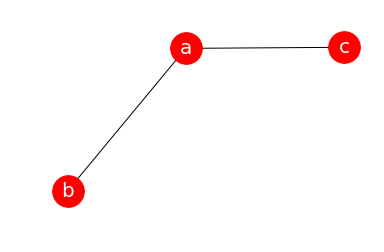

In [2]:
V = ['a', 'b', 'c']
E = [('a', 'b'), ('a', 'c')]
G = nx.Graph()
G.add_nodes_from(V)
G.add_edges_from(E)

nx.draw_networkx(G, **styles)
print('N(a) = {}'.format(G.neighbors('a')))
show_graph()

### Graphs can be directed or undirected
We can think of social networks as graphs. Each person is a node of the graph, and if they are friends, then we can connect them with an edge. On Facebook friendship is mutual. The `"__is friends with__"` relation is a _symmetric_. John is friends with Paul if and only if Paul is friends with John. 

When writing down the edges, we can think of this as saying that order does not matter $(j, p) = (p, j)$.

Twitter is a bit different. On Twitter, users have followers, and PJ can follow Alex, even if Alex doesn's follow PJ. If we were to represent Twitter as a graph, the nodes could still be users, like with Facebook, but the edges between them would have a direction. The `"__is following__"` realtion goes from one person to the other, and there may or may not be a connection going back the other way. In this case order matters, $(PJ, Alex) \neq (Alex, PJ)$

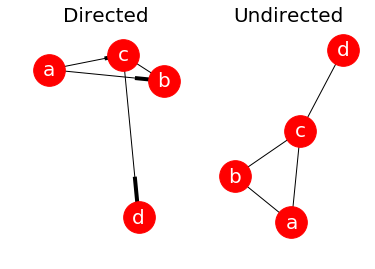

In [7]:
G = nx.DiGraph()
G.add_path(['a', 'b'])
G.add_path(['a', 'c'])
G.add_path(['b', 'c'])
G.add_path(['c', 'd'])

fig, ax = plt.subplots(ncols=2)

ax[0].set_title('Directed', size=20)
nx.draw_networkx(G, ax=ax[0],
                 **styles)

ax[1].set_title('Undirected', size=20)
nx.draw_networkx(G.to_undirected(), ax=ax[1],
                **styles)

show_graph(axes=ax)

### A _path_ is a set of nodes where each pair of consecutive nodes is connected by an edge
- If	a	graph	is	_directed_	the	edge	needs	to	be	in	the	right	direction
- A-B-C	is	a	path	in	both	previous	graphs. A-C-B is only a path in the undirected graph.


### A	cycle	is	a	path	where	the	start	node	is	also the	end	node	
- A-B-C	is	a	cycle	in	the	undirected	graph

### A	graph	is	_connected_	if	there	is	a	path	between	_every	pair_	of	nodes.	

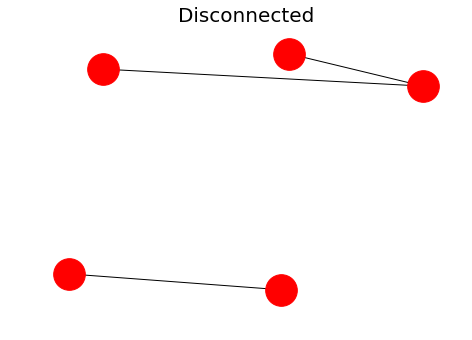

In [8]:
G = nx.Graph()
E = [(0,1), (2,3), (3,4)]
G.add_edges_from(E)

nx.draw(G, **styles)
plt.title('Disconnected', size=20);

### A _connected component_ of a graph is a subset of nodes for	which each of them has a path to al others

There are two components in the graph above.

A _giant component_ is a connected component containing a significant fraction of nodes in the network.

### The	_distance_ $d$ between	two	nodes is	the	length	of	the	shortest path between them.
The _diameter_ of the graph is the _maximum distance_ between any of nodes.